## sklearn.metrics.accuracy_score
* sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

## sklearn.metrics.precision_score
* sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

## sklearn.metrics.recall_score
* sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

## sklearn.metrics.confusion_matrix
* sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

## sklearn.metrics.f1_score
* sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test, lr_pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율:{recall:.4f}, F1:{f1:.4f}')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

titanic_df = pd.read_csv('./datasets/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
def fillna_features(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1,inplace=True)
    return df

def format_features(df):
    encoder = LabelEncoder()
    encoder.fit(df['Sex'])
    df['Sex'] = encoder.transform(df['Sex'])
    return df

def transform_features(df):
    df = fillna_features(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [5]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
get_clf_eval(y_test,lr_pred)

오차 행렬
[[100  18]
 [ 13  48]]
정확도: 0.8268, 정밀도: 0.7273, 재현율:0.7869, F1:0.7559


In [6]:
lr_clf.predict_proba(X_test)

array([[0.44781358, 0.55218642],
       [0.89023075, 0.10976925],
       [0.89752171, 0.10247829],
       [0.86466451, 0.13533549],
       [0.75812794, 0.24187206],
       [0.85434917, 0.14565083],
       [0.89752171, 0.10247829],
       [0.33510303, 0.66489697],
       [0.71971405, 0.28028595],
       [0.32644462, 0.67355538],
       [0.87119387, 0.12880613],
       [0.86256142, 0.13743858],
       [0.89752171, 0.10247829],
       [0.89752171, 0.10247829],
       [0.49595405, 0.50404595],
       [0.87551989, 0.12448011],
       [0.89752171, 0.10247829],
       [0.71971405, 0.28028595],
       [0.63693828, 0.36306172],
       [0.26366186, 0.73633814],
       [0.73662511, 0.26337489],
       [0.63032568, 0.36967432],
       [0.87238203, 0.12761797],
       [0.87551989, 0.12448011],
       [0.89752171, 0.10247829],
       [0.7459071 , 0.2540929 ],
       [0.8317686 , 0.1682314 ],
       [0.89752171, 0.10247829],
       [0.70807897, 0.29192103],
       [0.61020101, 0.38979899],
       [0.

In [7]:
lr_clf.predict_proba(X_test)[:,1]

array([0.55218642, 0.10976925, 0.10247829, 0.13533549, 0.24187206,
       0.14565083, 0.10247829, 0.66489697, 0.28028595, 0.67355538,
       0.12880613, 0.13743858, 0.10247829, 0.10247829, 0.50404595,
       0.12448011, 0.10247829, 0.28028595, 0.36306172, 0.73633814,
       0.26337489, 0.36967432, 0.12761797, 0.12448011, 0.10247829,
       0.2540929 , 0.1682314 , 0.10247829, 0.29192103, 0.38979899,
       0.91649723, 0.77255749, 0.10976925, 0.71941568, 0.36967432,
       0.2540929 , 0.09414747, 0.61237555, 0.08486912, 0.09660508,
       0.29192103, 0.11258397, 0.7895988 , 0.81228663, 0.55218642,
       0.55218642, 0.86025327, 0.49326354, 0.92998819, 0.10247829,
       0.50404595, 0.10247829, 0.11840276, 0.71362988, 0.3160186 ,
       0.21914964, 0.27103361, 0.10247829, 0.13409637, 0.50404595,
       0.29192103, 0.1154615 , 0.50404595, 0.50404595, 0.32453371,
       0.0893998 , 0.60559261, 0.54300651, 0.94190953, 0.10247829,
       0.14085054, 0.14433303, 0.09660508, 0.93871267, 0.22159

## sklearn.metrics.precision_recall_curve
* sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)

In [8]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [9]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict_proba(X_test)[:,1])

In [10]:
precisions.shape

(98,)

In [11]:
recalls.shape

(98,)

In [12]:
thresholds.shape

(97,)

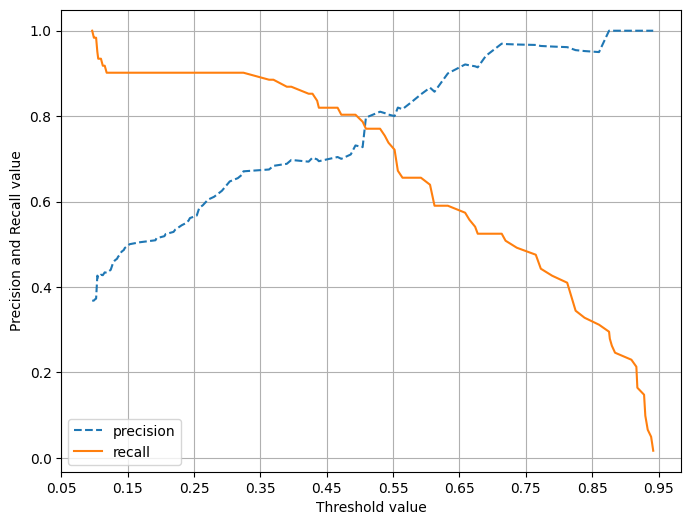

In [14]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])